In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [19]:
df = pd.read_csv('./Market_Basket_Optimisation.csv', header=None)
df.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,7501,5747,4389,3345,2529,1864,1369,981,654,395,256,154,87,47,25,8,4,4,3,1
unique,115,117,115,114,110,106,102,98,88,80,66,50,43,28,19,8,3,3,3,1
top,mineral water,mineral water,mineral water,mineral water,green tea,french fries,green tea,green tea,green tea,green tea,low fat yogurt,green tea,green tea,green tea,magazines,protein bar,frozen smoothie,protein bar,mayonnaise,olive oil
freq,577,484,375,201,153,107,96,67,57,31,22,15,8,4,3,1,2,2,1,1


In [102]:
items_breakup = df[0].value_counts().to_frame()
items_breakup.index[0:115].tolist()

['mineral water',
 'burgers',
 'turkey',
 'chocolate',
 'frozen vegetables',
 'spaghetti',
 'shrimp',
 'grated cheese',
 'eggs',
 'cookies',
 'french fries',
 'herb & pepper',
 'ground beef',
 'tomatoes',
 'milk',
 'escalope',
 'fresh tuna',
 'red wine',
 'ham',
 'cake',
 'green tea',
 'whole wheat pasta',
 'pancakes',
 'soup',
 'muffins',
 'energy bar',
 'olive oil',
 'champagne',
 'pepper',
 'avocado',
 'butter',
 'parmesan cheese',
 'whole wheat rice',
 'low fat yogurt',
 'chicken',
 'vegetables mix',
 'pickles',
 'meatballs',
 'frozen smoothie',
 'yogurt cake',
 'salmon',
 'dessert wine',
 'hot dogs',
 'honey',
 'cereals',
 'candy bars',
 'yams',
 'oil',
 'strawberries',
 'tomato sauce',
 'brownies',
 'cooking oil',
 'energy drink',
 'french wine',
 'antioxydant juice',
 'flax seed',
 'cottage cheese',
 'nonfat milk',
 'fromage blanc',
 'fresh bread',
 'protein bar',
 'pasta',
 'tomato juice',
 'gums',
 'light mayo',
 'almonds',
 'soda',
 'cider',
 'mint',
 'rice',
 'black tea',
 '

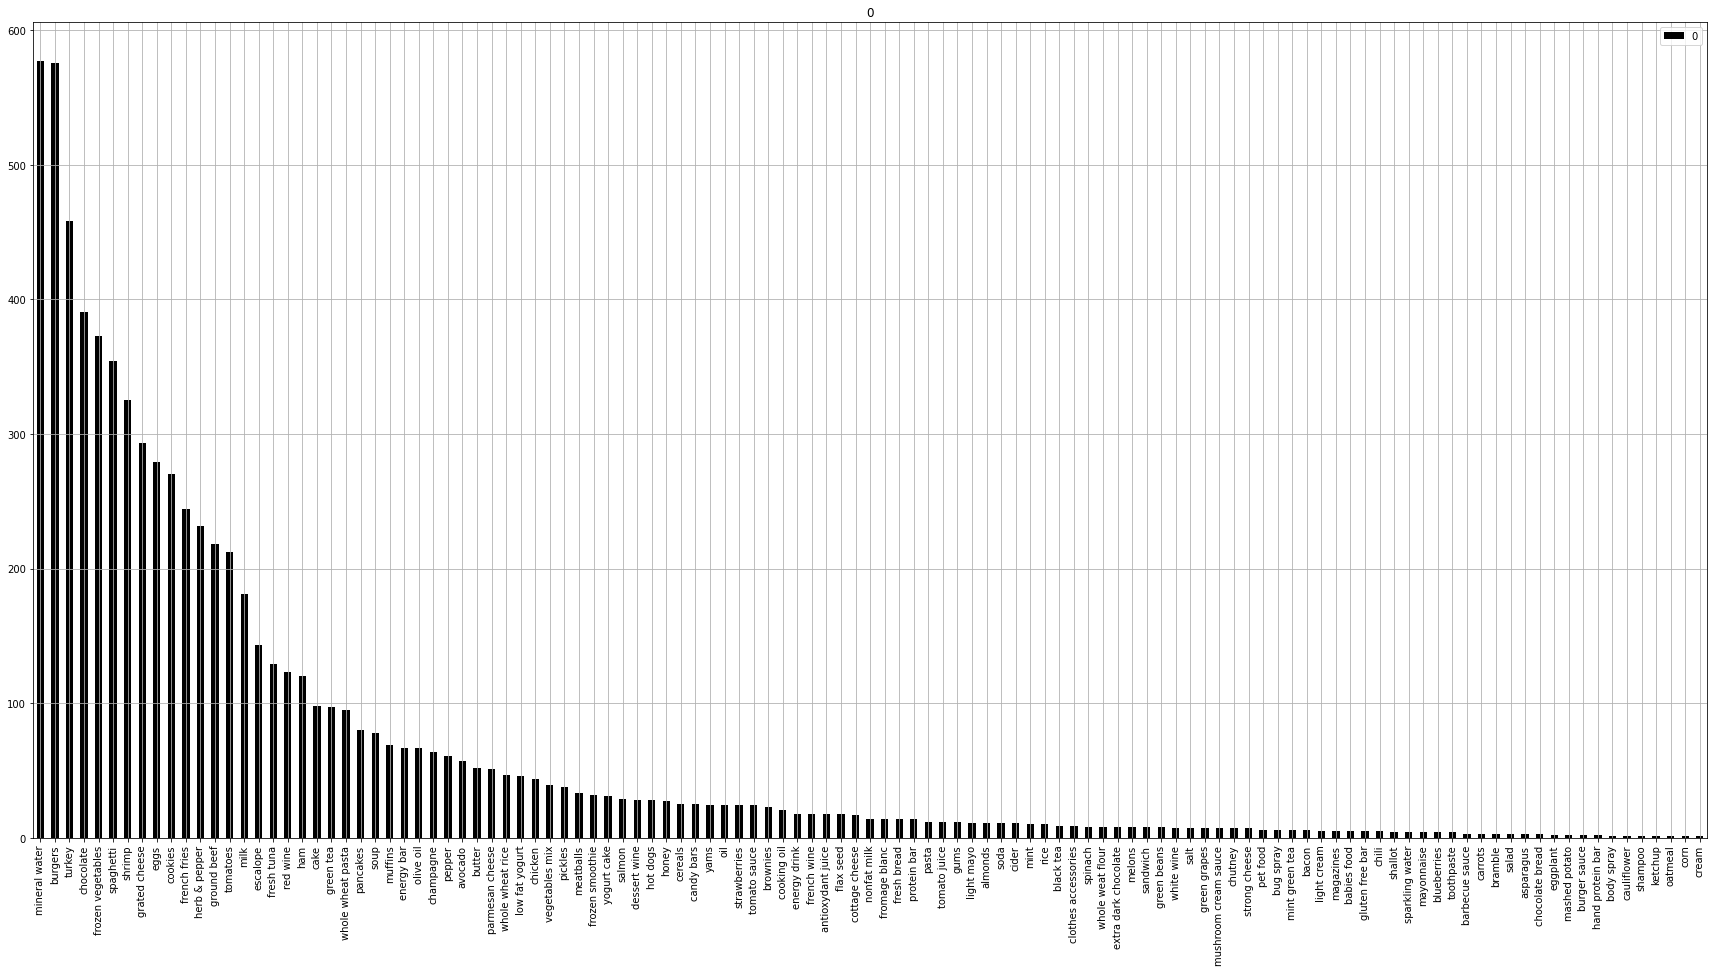

In [65]:
items_breakup.plot(kind= "bar",  figsize=(30,15),subplots=True, grid = True, color = "black")
plt.show()

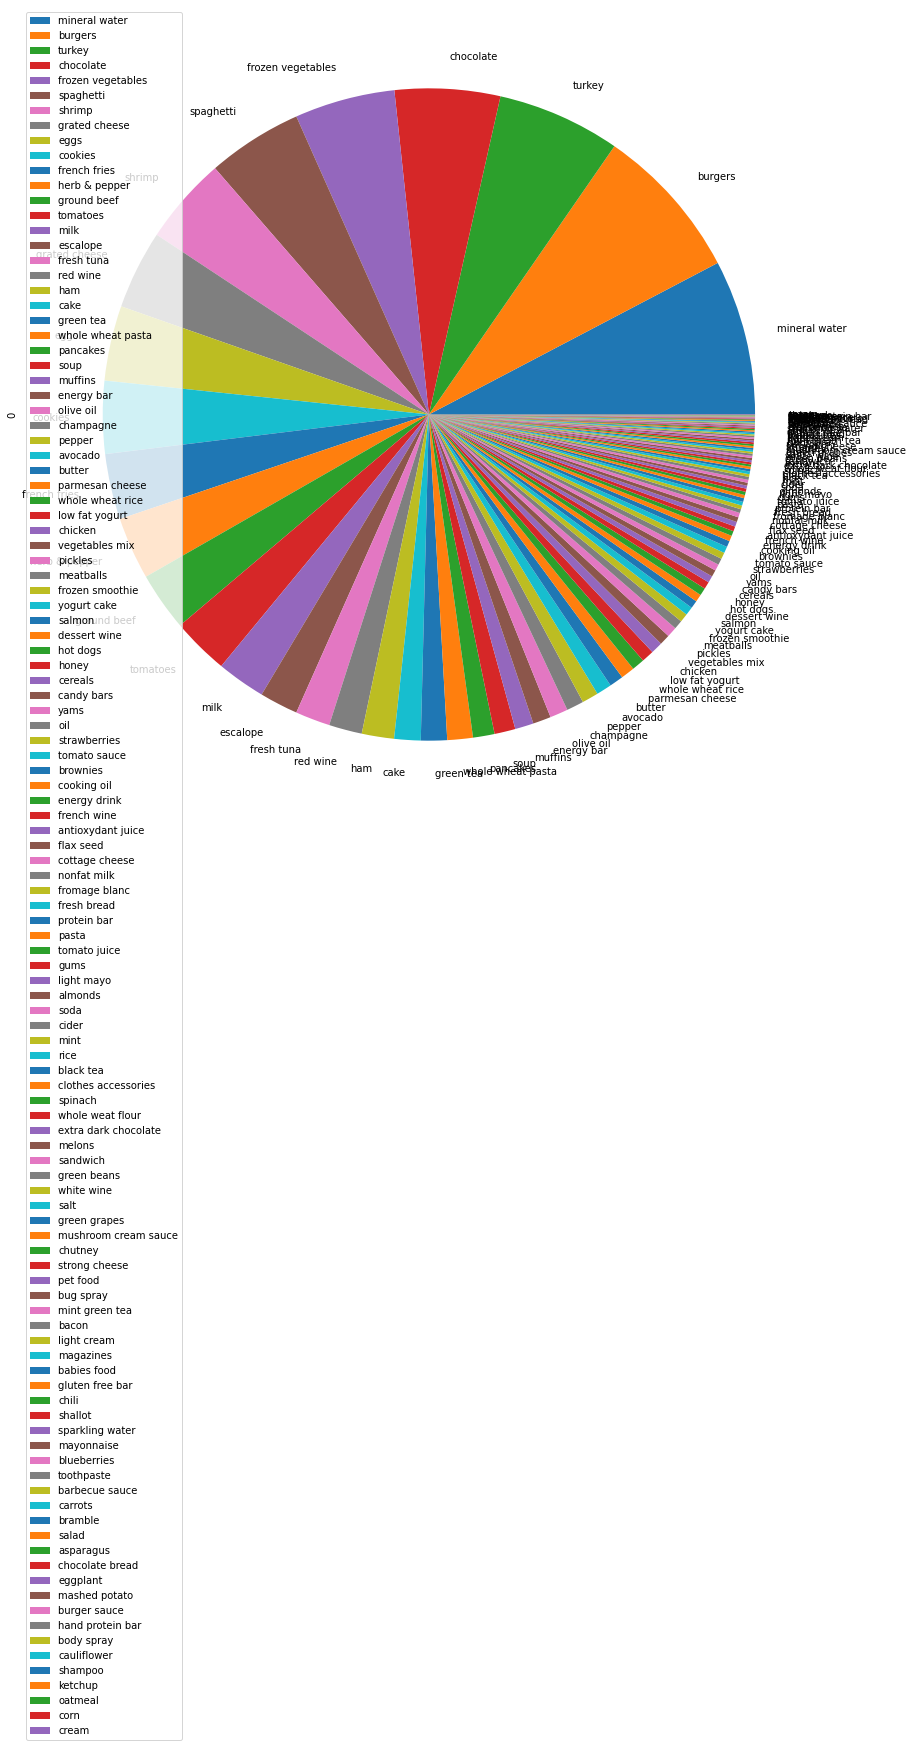

In [110]:
items_breakup.plot(kind= "pie",  figsize=(30,15),subplots=True )
plt.show()

In [66]:
transactions = []
for i in range(0, 7501):
  transactions.append([str(df.values[i,j]) for j in range(0, 20)])

In [70]:
transactions

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers',
  'meatballs',
  'eggs',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['chutney',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['turkey',
  'avocado',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['mineral water',
  'milk',
  'energy bar',
  'whole wheat rice',
  'green tea',
  'nan',
  'nan',
  'nan',
 

In [87]:
from apyori import apriori
rules = apriori(transactions = transactions, min_support = 0.003, min_confidence = 0.3, min_lift = 3, min_length = 2, max_length = 2)
results = list(rules)
results


[RelationRecord(items=frozenset({'escalope', 'mushroom cream sauce'}), support=0.005732568990801226, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.3006993006993007, lift=3.790832696715049)]),
 RelationRecord(items=frozenset({'escalope', 'pasta'}), support=0.005865884548726837, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pasta'}), items_add=frozenset({'escalope'}), confidence=0.3728813559322034, lift=4.700811850163794)]),
 RelationRecord(items=frozenset({'ground beef', 'herb & pepper'}), support=0.015997866951073192, ordered_statistics=[OrderedStatistic(items_base=frozenset({'herb & pepper'}), items_add=frozenset({'ground beef'}), confidence=0.3234501347708895, lift=3.2919938411349285)]),
 RelationRecord(items=frozenset({'ground beef', 'tomato sauce'}), support=0.005332622317024397, ordered_statistics=[OrderedStatistic(items_base=frozenset({'tomato sauce'}), items_add=frozenset({'groun

In [88]:
def inspect(results):
    lhs         = [tuple(result[2][0][0])[0] for result in results]
    rhs         = [tuple(result[2][0][1])[0] for result in results]
    supports    = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts       = [result[2][0][3] for result in results]
    return list(zip(lhs, rhs, supports, confidences, lifts))
resultsinDataFrame = pd.DataFrame(inspect(results), columns = ['Left Hand Side', 'Right Hand Side', 'Confidence', 'Support',  'Lift'])

## Displaying the results non sorted
resultsinDataFrame

## Displaying the results sorted by descending lifts
resultsinDataFrame.nlargest(n = 20, columns = 'Lift')

,Left Hand Side,Right Hand Side,Confidence,Support,Lift
1,pasta,escalope,0.005866,0.372881,4.700812
4,pasta,shrimp,0.005066,0.322034,4.506672
3,tomato sauce,ground beef,0.005333,0.377358,3.840659
0,mushroom cream sauce,escalope,0.005733,0.300699,3.790833
2,herb & pepper,ground beef,0.015998,0.323450,3.291994


In [90]:
counts = [len(transactions) for transactions in transactions]
print(f'50 percent of the transactions are having items below or equal to {np.quantile(counts, .5)} only')
print(f'particular transaction having a maximum of {np.quantile(counts, 1)} items in it')

50 percent of the transactions are having items below or equal to 20.0 only
particular transaction having a maximum of 20 items in it


In [93]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
onehot = te.fit_transform(transactions)
onehot = pd.DataFrame(onehot, columns = te.columns_)
print(f'Shape of encoded data: {onehot.shape[0]} rows and {onehot.shape[1]} columns')


Shape of encoded data: 7501 rows and 121 columns


In [104]:
onehot = onehot.loc[:,['mineral water',
 'burgers',
 'turkey',
 'chocolate',
 'frozen vegetables',
 'spaghetti',
 'shrimp',
 'grated cheese',
 'eggs',
 'cookies',
 'french fries',
 'herb & pepper',
 'ground beef',
 'tomatoes',
 'milk',
 'escalope',
 'fresh tuna',
 'red wine',
 'ham',
 'cake',
 'green tea',
 'whole wheat pasta',
 'pancakes',
 'soup',
 'muffins',
 'energy bar',
 'olive oil',
 'champagne',
 'pepper',
 'avocado',
 'butter',
 'parmesan cheese',
 'whole wheat rice',
 'low fat yogurt',
 'chicken',
 'vegetables mix',
 'pickles',
 'meatballs',
 'frozen smoothie',
 'yogurt cake',
 'salmon',
 'dessert wine',
 'hot dogs',
 'honey',
 'cereals',
 'candy bars',
 'yams',
 'oil',
 'strawberries',
 'tomato sauce',
 'brownies',
 'cooking oil',
 'energy drink',
 'french wine',
 'antioxydant juice',
 'flax seed',
 'cottage cheese',
 'nonfat milk',
 'fromage blanc',
 'fresh bread',
 'protein bar',
 'pasta',
 'tomato juice',
 'gums',
 'light mayo',
 'almonds',
 'soda',
 'cider',
 'mint',
 'rice',
 'black tea',
 'clothes accessories',
 'spinach',
 'whole weat flour',
 'extra dark chocolate',
 'melons',
 'sandwich',
 'green beans',
 'white wine',
 'salt',
 'green grapes',
 'mushroom cream sauce',
 'chutney',
 'strong cheese',
 'pet food',
 'bug spray',
 'mint green tea',
 'bacon',
 'light cream',
 'magazines',
 'babies food',
 'gluten free bar',
 'chili',
 'shallot',
 'sparkling water',
 'mayonnaise',
 'blueberries',
 'toothpaste',
 'barbecue sauce',
 'carrots',
 'bramble',
 'salad',
 'asparagus',
 'chocolate bread',
 'eggplant',
 'mashed potato',
 'burger sauce',
 'hand protein bar',
 'body spray',
 'cauliflower',
 'shampoo',
 'ketchup',
 'oatmeal',
 'corn',
 'cream']]

In [105]:
print(f'Shape of encoded data: {onehot.shape[0]} rows and {onehot.shape[1]} columns')


Shape of encoded data: 7501 rows and 115 columns


In [106]:
from mlxtend.frequent_patterns import apriori, association_rules

frequent_itemsets=apriori(onehot, min_support=0.0001, use_colnames=True, max_len=3)
frequent_itemsets

,support,itemsets
0,0.238368,(mineral water)
1,0.087188,(burgers)
2,0.062525,(turkey)
3,0.163845,(chocolate)
4,0.095321,(frozen vegetables)
...,...,...
63263,0.000133,"(ketchup, shampoo, barbecue sauce)"
63264,0.000133,"(corn, asparagus, carrots)"
63265,0.000133,"(eggplant, burger sauce, carrots)"
63266,0.000133,"(eggplant, carrots, oatmeal)"
